# **Anti Money Laundering Transactions Analysis**

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("AML_Data_Raw.csv")

print(data)


             Time        Date  Sender_account  Receiver_account    Amount  \
0        10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1        10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2        10:35:20  2022-10-07       287305149        4404767002  14328.44   
3        10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4        10:35:21  2022-10-07      9614186178        3803336972    115.25   
...           ...         ...             ...               ...       ...   
9504847  10:57:01  2023-08-23      2453933570         519744068   2247.25   
9504848  10:57:06  2023-08-23      9805510177        5416607878    927.18   
9504849  10:57:06  2023-08-23      7282330957        2995527149   1455.14   
9504850  10:57:11  2023-08-23       940337377        4812815165  25995.70   
9504851  10:57:12  2023-08-23       105185176        6824994831   9586.08   

        Payment_currency Received_currency Sender_bank_location  \
0       

**STEP 1: EXPLORING THE DATA(EDA)**

In [4]:
data.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [5]:
data.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [6]:
data.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [8]:
data.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

In [9]:
data.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

**STEP 2: CLEANING THE DATA**

In [10]:
# Converting date column data type from 'object' to 'datetime'

data['Date'] = pd.to_datetime(data['Date'])

# Date and Time columns had duplicated data, and both held only dates, so dropped the time column

# Converting sender_account and receiver account column datatypes from int to 'object' since we don't need those columns for calculations

data['Sender_account'] = data['Sender_account'].astype('object')

data['Receiver_account'] = data['Receiver_account'].astype('object')

data.columns
#data.dtypes

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

Before we split the data to feed into our model, one thing to consider is that there is only one numerical column we can truly do calculations on, and that wouldn't be a great way to train our model if it just learns to categorize money laundered or not by the transaction amount.

**STEP 3: FEATURE ENGINEERING**

In [11]:
# Checking count of transactions that have locations that are less than 1% and more than 1%

sender_location_count = data['Sender_bank_location'].value_counts()

receiver_location_count = data['Receiver_bank_location'].value_counts()

print(f"Total sender locations: {sender_location_count.sum()}")
print(f"Total receiver locations: {receiver_location_count.sum()}")

print(sender_location_count['UK'])
print(receiver_location_count['UK'])

Percentage_sender_location = sender_location_count / sender_location_count['UK']

Percentage_receiver_location = receiver_location_count / receiver_location_count['UK']

print(Percentage_sender_location)
print(Percentage_receiver_location)


Total sender locations: 9504852
Total receiver locations: 9504852
9183088
8864634
Sender_bank_location
UK             1.000000
Turkey         0.002276
Switzerland    0.002233
Pakistan       0.002216
UAE            0.002187
Nigeria        0.002181
Spain          0.002112
Germany        0.002097
USA            0.002072
Italy          0.002058
France         0.002037
Japan          0.002011
Morocco        0.002008
Austria        0.001966
Mexico         0.001923
Albania        0.001922
India          0.001916
Netherlands    0.001826
Name: count, dtype: float64
Receiver_bank_location
UK             1.000000
Pakistan       0.004397
Austria        0.004382
Albania        0.004375
Japan          0.004369
Morocco        0.004366
Germany        0.004348
France         0.004344
Mexico         0.004330
Nigeria        0.004317
Netherlands    0.004209
Spain          0.004206
India          0.004167
USA            0.004157
Italy          0.004119
Switzerland    0.004070
UAE            0.004049
Turkey

As we can see, we have a total of 9,504,852 sender and receiver account locations, out of which, 9183088 are in UK, so we can add a threshold that anything less than 1 percent is rare.

In [12]:
threshold = 0.01 * len(data)

print(threshold)

95048.52


In [13]:
rare_sender_locations = sender_location_count[sender_location_count < threshold]

print(rare_sender_locations.index)

rare_receiver_locations = receiver_location_count[receiver_location_count < threshold]
# Locations where less than 1% transactions are made from.

print(rare_receiver_locations.index)

Index(['Turkey', 'Switzerland', 'Pakistan', 'UAE', 'Nigeria', 'Spain',
       'Germany', 'USA', 'Italy', 'France', 'Japan', 'Morocco', 'Austria',
       'Mexico', 'Albania', 'India', 'Netherlands'],
      dtype='object', name='Sender_bank_location')
Index(['Pakistan', 'Austria', 'Albania', 'Japan', 'Morocco', 'Germany',
       'France', 'Mexico', 'Nigeria', 'Netherlands', 'Spain', 'India', 'USA',
       'Italy', 'Switzerland', 'UAE', 'Turkey'],
      dtype='object', name='Receiver_bank_location')


In [14]:
# To be able to use the location in calculations, we can encode anything other than UK as "other".

data['sender_location'] = data['Sender_bank_location'].apply(lambda x: "Other" if x in rare_sender_locations else "UK")

data['receiver_location'] = data['Receiver_bank_location'].apply(lambda x: "Other" if x in rare_receiver_locations else "UK")

print(data['sender_location'])
print(data['receiver_location'])

0          UK
1          UK
2          UK
3          UK
4          UK
           ..
9504847    UK
9504848    UK
9504849    UK
9504850    UK
9504851    UK
Name: sender_location, Length: 9504852, dtype: object
0             UK
1          Other
2             UK
3             UK
4             UK
           ...  
9504847       UK
9504848       UK
9504849       UK
9504850       UK
9504851       UK
Name: receiver_location, Length: 9504852, dtype: object


In [15]:
location_map = {'UK': 0, 'Other': 1}

In [16]:
data['sender_location_encoded'] = data['sender_location'].map(location_map)
data['receiver_location_encoded'] = data['receiver_location'].map(location_map)

print(data['sender_location_encoded'])
print(data['receiver_location_encoded'])

0          0
1          0
2          0
3          0
4          0
          ..
9504847    0
9504848    0
9504849    0
9504850    0
9504851    0
Name: sender_location_encoded, Length: 9504852, dtype: int64
0          0
1          1
2          0
3          0
4          0
          ..
9504847    0
9504848    0
9504849    0
9504850    0
9504851    0
Name: receiver_location_encoded, Length: 9504852, dtype: int64


As we have now encoded the locations, there are currencies that are highly imbalanced, and we will now check their counts, like we did for location.

For the currency, we will take the same steps, however, since we have UK pounds and Euro as highly common, we will make them the common ones, and rest of them as rare ones.

In [17]:
sent_currency_counts = data['Payment_currency'].value_counts()
received_currency_counts = data['Received_currency'].value_counts()

threshold_currency = 0.01 * len(data)

rarely_sent_currency = sent_currency_counts[sent_currency_counts < threshold_currency]
rarely_received_currency = received_currency_counts[received_currency_counts < threshold_currency]

commonly_sent_currency = sent_currency_counts[sent_currency_counts > threshold_currency]
commonly_received_currency = received_currency_counts[received_currency_counts > threshold_currency]

print(rarely_sent_currency.index)
print(rarely_received_currency.index)

print(commonly_sent_currency)
print(commonly_received_currency)

Index(['Turkish lira', 'Swiss franc', 'Dirham', 'Pakistani rupee', 'Naira',
       'US dollar', 'Yen', 'Moroccan dirham', 'Mexican Peso', 'Albanian lek',
       'Indian rupee'],
      dtype='object', name='Payment_currency')
Index(['Pakistani rupee', 'Yen', 'Moroccan dirham', 'Albanian lek',
       'Mexican Peso', 'Naira', 'Indian rupee', 'US dollar', 'Swiss franc',
       'Dirham', 'Turkish lira'],
      dtype='object', name='Received_currency')
Payment_currency
UK pounds    9099293
Euro          117164
Name: count, dtype: int64
Received_currency
UK pounds    8783655
Euro          231911
Name: count, dtype: int64


In [18]:
data['sent_currency'] = data['Payment_currency'].apply(lambda currency: currency if currency in ["UK pounds", "Euro"] else "Other")
data['received_currency'] = data['Received_currency'].apply(lambda currency: currency if currency in ['UK pounds', 'Euro'] else "Other")

In [19]:
currency_map = {"UK pounds":0, "Euro":1, "Other":2}

data['sent_currency_encoded'] = data['sent_currency'].map(currency_map)
data['received_currency_encoded'] = data['received_currency'].map(currency_map)

print(data['sent_currency_encoded'])
print(data['received_currency_encoded'])

0          0
1          0
2          0
3          0
4          0
          ..
9504847    0
9504848    0
9504849    0
9504850    0
9504851    0
Name: sent_currency_encoded, Length: 9504852, dtype: int64
0          0
1          2
2          0
3          0
4          0
          ..
9504847    0
9504848    0
9504849    0
9504850    0
9504851    0
Name: received_currency_encoded, Length: 9504852, dtype: int64


In [20]:
data['Payment_type'].unique()

array(['Cash Deposit', 'Cross-border', 'Cheque', 'ACH', 'Credit card',
       'Debit card', 'Cash Withdrawal'], dtype=object)

Now, we will do the same for payment type and laundering type. However, one thing to be noted is that there are several categoris in each of the columns, and those categories are highly imbalanced, with several common and rare ones.

In [21]:
payment_type_threshold = 0.2 * len(data)

payment_type_counts = data['Payment_type'].value_counts()

common_payment_types = payment_type_counts[payment_type_counts > payment_type_threshold]
rare_payment_types = payment_type_counts[payment_type_counts < payment_type_threshold]

data['payment_types'] = data['Payment_type'].apply(lambda pmt_type: pmt_type if pmt_type in common_payment_types else "Other")

#print(rare_payment_types)

payment_type_map = {"ACH":0, "Cheque":1, "Credit card":2, "Debit card":3, "Other":5}

data['payment_type_encoded'] = data['payment_types'].map(payment_type_map)

print(data['payment_type_encoded'])

0          5
1          5
2          1
3          0
4          5
          ..
9504847    0
9504848    3
9504849    0
9504850    0
9504851    0
Name: payment_type_encoded, Length: 9504852, dtype: int64


Now, we will be using the Laundering type, to encode it, so that we can feed that information to the model, to predict money-laundering better.

In [22]:
data['Laundering_type'].value_counts()

Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: count, dtype: int64

As we can observe, we have several laundering categories that are dominant and several that are rare. So, to ensure accuracy in our predictions, we can take 7-8 categories that are dominant and mark the remaining as Others.

In [38]:
common_laundering_types = data["Laundering_type"].value_counts().head(8)

#print(common_laundering_types.index)

laundering_types = data['Laundering_type'].apply(lambda laundering_type: laundering_type if laundering_type in common_laundering_types else "Other" )

#print(laundering_types)

laundering_type_map = {"Normal_Small_Fan_Out": 0, 'Normal_Fan_Out':1, 'Normal_Fan_In':2,
       'Normal_Group':3, 'Normal_Cash_Withdrawal':4, 'Normal_Cash_Deposits':5,
       'Normal_Periodical':6, 'Normal_Plus_Mutual':7, "Others":9 }

data['laundering_type_encoded'] = laundering_types.map(laundering_type_map)

print(data['laundering_type_encoded'])

data['laundering_type_encoded'] = data['laundering_type_encoded'].fillna(-1).astype(int) # While training, this column gave NAN issues, so filled NA as -1, and converted the whole column to integer.

print(data['laundering_type_encoded'].isnull().sum())

0          5.0
1          1.0
2          0.0
3          2.0
4          5.0
          ... 
9504847    0.0
9504848    0.0
9504849    0.0
9504850    2.0
9504851    1.0
Name: laundering_type_encoded, Length: 9504852, dtype: float64
0


Here is a list of features we will use to train and test our model, to make predictions.

In [41]:
# FEATURES we will use to make predictions.

data['Is_laundering']
data['laundering_type_encoded']
data['Amount']
data['payment_type_encoded']
data['sent_currency_encoded']
data['received_currency_encoded']
data['sender_location_encoded']
data['receiver_location_encoded']


0          0
1          1
2          0
3          0
4          0
          ..
9504847    0
9504848    0
9504849    0
9504850    0
9504851    0
Name: receiver_location_encoded, Length: 9504852, dtype: int64

In [45]:
log_amount = np.log1p(data['Amount'])

We have 2 paths from here: Either we can visualize the data or train a model. Logically, it would be better to visualize the data to see if we would need to use numpy to calculate and find log1p values(in easy language, a calculator that includes even minor values like 1 paisa), for amount.

So, we will first use matplotlib and seaborn to plot the data to have better understanding through visualization.

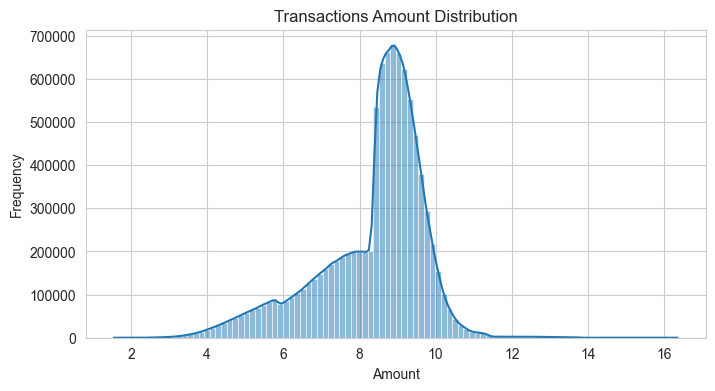

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(log_amount, bins=100, kde=True)  # kde = Kernel Distribution Estimate(draws a smooth curve over histogram to show distribution.
plt.title("Transactions Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

As we can see in our histogram, we have 2 extremely thin lines- one really large and another very little. This means our data is highly skewed(imbalanced).

Also, as matplotlib stretches the x-axis, it accumulated everything into a very think line.

To tackle this problem, we can use log1p, which is log(1 + x), and helps us find the log of very tiny values as well. Since we don't have tiny values in our dataset, we can also use log(1+x) and get basically the same answer.